In [1]:
import torchaudio
from audiocraft.models import MusicGen
from audiocraft.data.audio import audio_write
from audiocraft.utils.notebook import display_audio

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.3.1)
    Python  3.9.13 (you have 3.9.19)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
C:\Users\kuotz\anaconda3\envs\py39\lib\site-packages\transformers\utils\generic.py:485: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\kuotz\anaconda3\envs\py39\lib\site-packages\transformers\utils\generic.py:342: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torc

In [2]:
model = MusicGen.get_pretrained('melody', device = 'cuda')
model.set_generation_params(duration=15)  # generate 8 seconds.

C:\Users\kuotz\anaconda3\envs\py39\lib\site-packages\audiocraft\models\musicgen.py:80: UserWarning: MusicGen pretrained model relying on deprecated checkpoint mapping. Please use full pre-trained id instead: facebook/musicgen-melody
  warnings.warn(
C:\Users\kuotz\anaconda3\envs\py39\lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [3]:
wav = model.generate_unconditional(1)    # generates 4 unconditional audio samples for each description

descriptions = ['happy energetic fast guitar',]

C:\Users\kuotz\anaconda3\envs\py39\lib\site-packages\audiocraft\modules\transformer.py:413: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  x = torch.nn.functional.scaled_dot_product_attention(


In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
device

device(type='cuda')

In [6]:
#Generate the music
wav = model.generate(descriptions,progress=True)

In [7]:
#display the audio
display_audio(wav, 32000)

In [8]:
#download the audio
for idx, one_wav in enumerate(wav):
    # Will save under {idx}.wav, with loudness normalization at -14 db LUFS.
    audio_write(f'{idx}', one_wav.cpu(), model.sample_rate, strategy="loudness", loudness_compressor=True)

In [10]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [12]:
x, sr = librosa.load('0.wav')
ipd.Audio(x, rate=sr)

In [14]:
hop_length = 512
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

In [16]:
float(hop_length)/sr # units of seconds

0.023219954648526078

In [18]:
float(n_fft)/sr  # units of seconds

0.09287981859410431

In [20]:
X.shape

(1025, 646)

In [22]:
S = librosa.amplitude_to_db(abs(X))

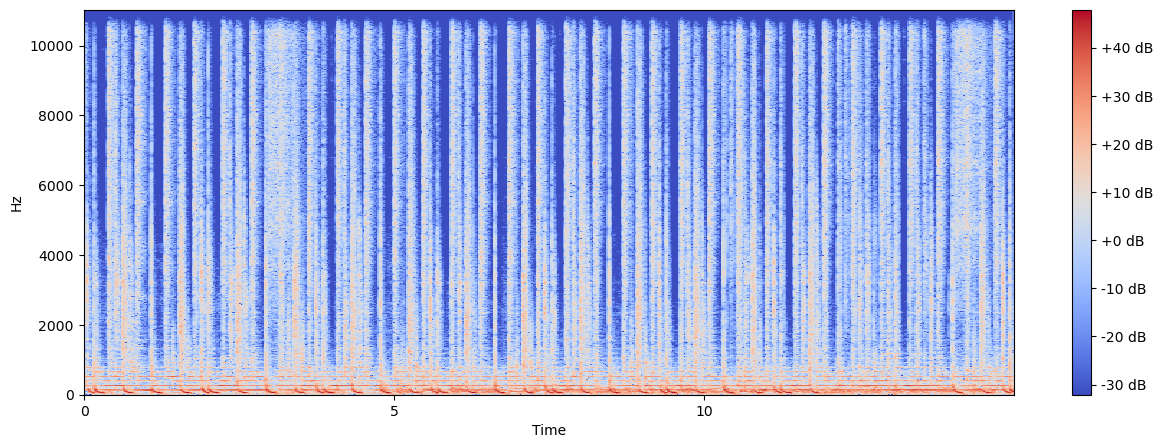

In [24]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

(1025, 646)


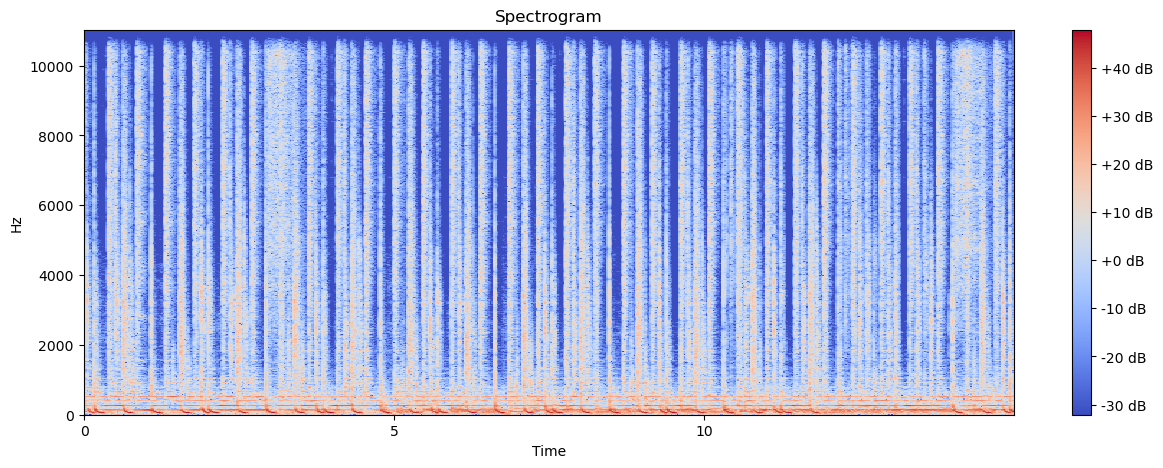

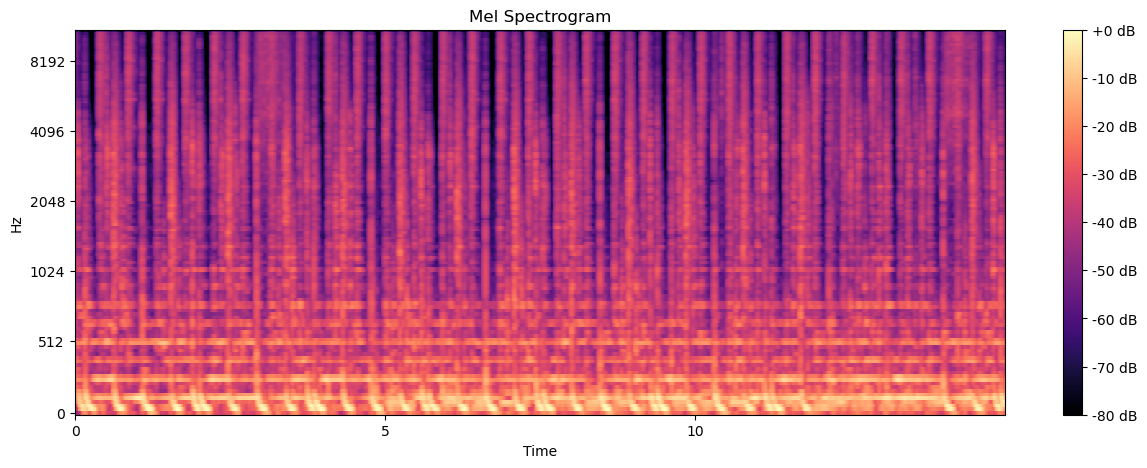

In [30]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load audio file
x, sr = librosa.load('0.wav')
ipd.Audio(x, rate=sr)

# Short-time Fourier Transform (STFT)
hop_length = 512
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

# Convert hop_length and n_fft to time units
hop_length_seconds = float(hop_length) / sr
n_fft_seconds = float(n_fft) / sr

# Print the shape of the STFT matrix
print(X.shape)

# Convert amplitude to dB
S = librosa.amplitude_to_db(np.abs(X))

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# Mel spectrogram
hop_length = 256
S = librosa.feature.melspectrogram(y=x, sr=sr, n_fft=4096, hop_length=hop_length)

# Convert the mel spectrogram to dB
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the mel spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


In [32]:
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72)
logC = librosa.amplitude_to_db(abs(C))

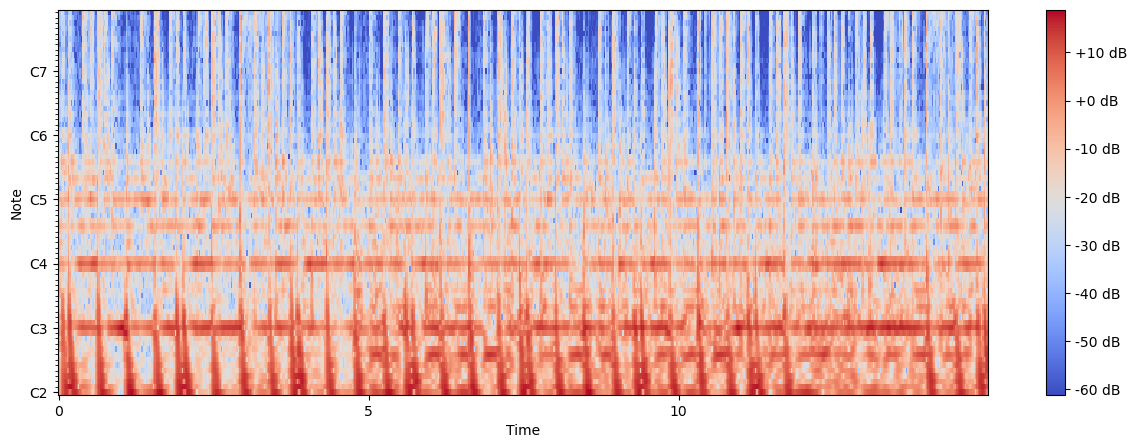

In [34]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')